## Table of Contents
- [1 - Problem statement](#1)
- [2 - Import useful libraries](#2)
- [3 - Loading Dataset](#3)

    - [Exercise 1](#ex-1)

<a name='1'></a>
## 1 - Problem Statement
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

Task
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

<a name='2'></a>
## 2 - Import useful libraries ##

In [17]:
# standard libraries
import numpy as np 
import pandas as pd 

# time libraries 
from tqdm import tqdm
from time import time

# visualization library
import umap.umap_ as UMAP

# resampling libraries
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler

# scikit-learn libraries for preprocessing and report analysis 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import classification_report, confusion_matrix

# tensorflow libraries for Neural Network implementation
import tensorflow as tf
from tensorflow.keras import Sequential, initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import L2

# standard plot library
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<a name='3'></a>
## 3 - Load and visualize the Dataset ##
Dataset features (27) and target (1). 
* <span style="color:blue">**blue**</span> $\rightarrow$ redundant features
* <span style="color:red">**red**</span> $\rightarrow$ features with wrong data type
* <span style="color:green">**green**</span> $\rightarrow$ target
* (#) $\rightarrow$ numerical feature
* (A) $\rightarrow$ categorical feature

1. (<span style="color:blue">**A**</span>) **ID**: Represents a unique identification of an entry
2. (A) **Customer_ID**: Represents a unique identification of a person
3. (A) **Month**: Represents the month of the year
4. (<span style="color:blue">**A**</span>) **Name**: Represents the name of a person
5. (<span style="color:red">**A**</span>) **Age**: Represents the age of the person
6. (<span style="color:blue">**A**</span>) **SSN**: Represents the social security number of a person
7. (A) **Occupation**: Represents the occupation of the person
8. (<span style="color:red">**A**</span>) **Annual_Income**: Represents the annual income of the person
9. (#) **Monthly_Inhand_Salary**: Represents the monthly base salary of a person
10. (#) **Num_Bank_Accounts**: Represents the number of bank accounts a person holds
11. (#) **Num_Credit_Card**: Represents the number of other credit cards held by a person
12. (#) **Interest_Rate**: Represents the interest rate on credit card
13. (<span style="color:red">**A**</span>) **Num_of_Loan**: Represents the number of loans taken from the bank
14. (A) **Type_of_Loan**: Represents the types of loan taken by a person
15. (#) **Delay_from_due_date**: Represents the average number of days delayed from the payment date
16. (<span style="color:red">**A**</span>) **Num_of_Delayed_Payment**: Represents the average number of payments delayed by a person
17. (#) **Changed_Credit_Limit**: Represents the percentage change in credit card limit
18. (#) **Num_Credit_Inquiries**: Represents the number of credit card inquiries
19. (A) **Credit_Mix**: Represents the classification of the mix of credits
20. (<span style="color:red">**A**</span>) **Outstanding_Debt**: Represents the remaining debt to be paid (in USD)
21. (#) **Credit_Utilization_Ratio**: Represents the utilization ratio of credit card
22. (<span style="color:red">**A**</span>) **Credit_History_Age**: Represents the age of credit history of the person
23. (A) **Payment_of_Min_Amount**: Represents whether only the minimum amount was paid by the person
24. (#) **Total_EMI_per_month**: Represents the monthly EMI payments (in USD)
25. (<span style="color:red">**A**</span>) **Amount_invested_monthly**: Represents the monthly amount invested by the customer (in USD)
26. (A) **Payment_Behaviour**: Represents the payment behavior of the customer (in USD)
27. (#) **Monthly_Balance**: Represents the monthly balance amount of the customer (in USD)
28. (<span style="color:green">**A**</span>) **Credit_Score**: Represents the bracket of credit score (Poor, Standard, Good)

In [19]:
# low_memory=False because it has 26 columns with mixed types
df = pd.read_csv("../Data/train.csv", low_memory=False)
# remove redundant features
df.drop(columns=['ID', 'Name', 'SSN'], inplace=True)
df.head()

Customer_ID     Month   Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0   CUS_0xd40   January    23  Scientist      19114.12            1824.843333   
1   CUS_0xd40  February    23  Scientist      19114.12                    NaN   
2   CUS_0xd40     March  -500  Scientist      19114.12                    NaN   
3   CUS_0xd40     April    23  Scientist      19114.12                    NaN   
4   CUS_0xd40       May    23  Scientist      19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  ...  \
0                  3                4              3           4  ...   
1                  3                4              3           4  ...   
2                  3                4              3           4  ...   
3                  3                4              3           4  ...   
4                  3                4              3           4  ...   

  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0          _            809.98                26.822620   
1       Good            809.98                31.944960   
2       Good            809.98                28.609352   
3       Good            809.98                31.377862   
4       Good            809.98                24.797347   

      Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0  22 Years and 1 Months                     No           49.574949   
1                    NaN                     No           49.574949   
2  22 Years and 3 Months                     No           49.574949   
3  22 Years and 4 Months                     No           49.574949   
4  22 Years and 5 Months                     No           49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good  

[5 rows x 25 columns]

In [16]:
import pandas_profiling as pp
pp.ProfileReport(df, title = 'Pandas Profiling report of "dataset"', html = {'style':{'full_width': True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Preliminary preprocessing to plot a boxplot for the numerical features

In [32]:
df.loc[df.Monthly_Balance == "__-333333333333333333333333333__", 'Monthly_Balance'] = None
df.loc[df.Amount_invested_monthly == "__10000__", 'Amount_invested_monthly'] = None

Transform the column 'Credit_History_Age' from string (e.g )  

In [35]:
df.loc[df.Credit_History_Age.notna(),
       'Credit_History_Age'] = df['Credit_History_Age'].str.extractall('(\d+)').unstack().astype(float).multiply([12, 1]).sum(axis=1)
df['Credit_History_Age'] = df['Credit_History_Age'].astype(float)

In [36]:
cat = df.select_dtypes(include=["object"]).columns

features = [feature for feature in cat if df[feature].str.contains('_').any()]
features.remove('Customer_ID')

for feature in features:
    df[feature] = df[feature].str.replace("_", "")

features = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
            'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly',
            'Monthly_Balance']

for feature in features:
    df[feature] = pd.to_numeric(df[feature]).astype('float')
    
num = df.select_dtypes(include=["number"]).columns

## 5 - Box plot ##

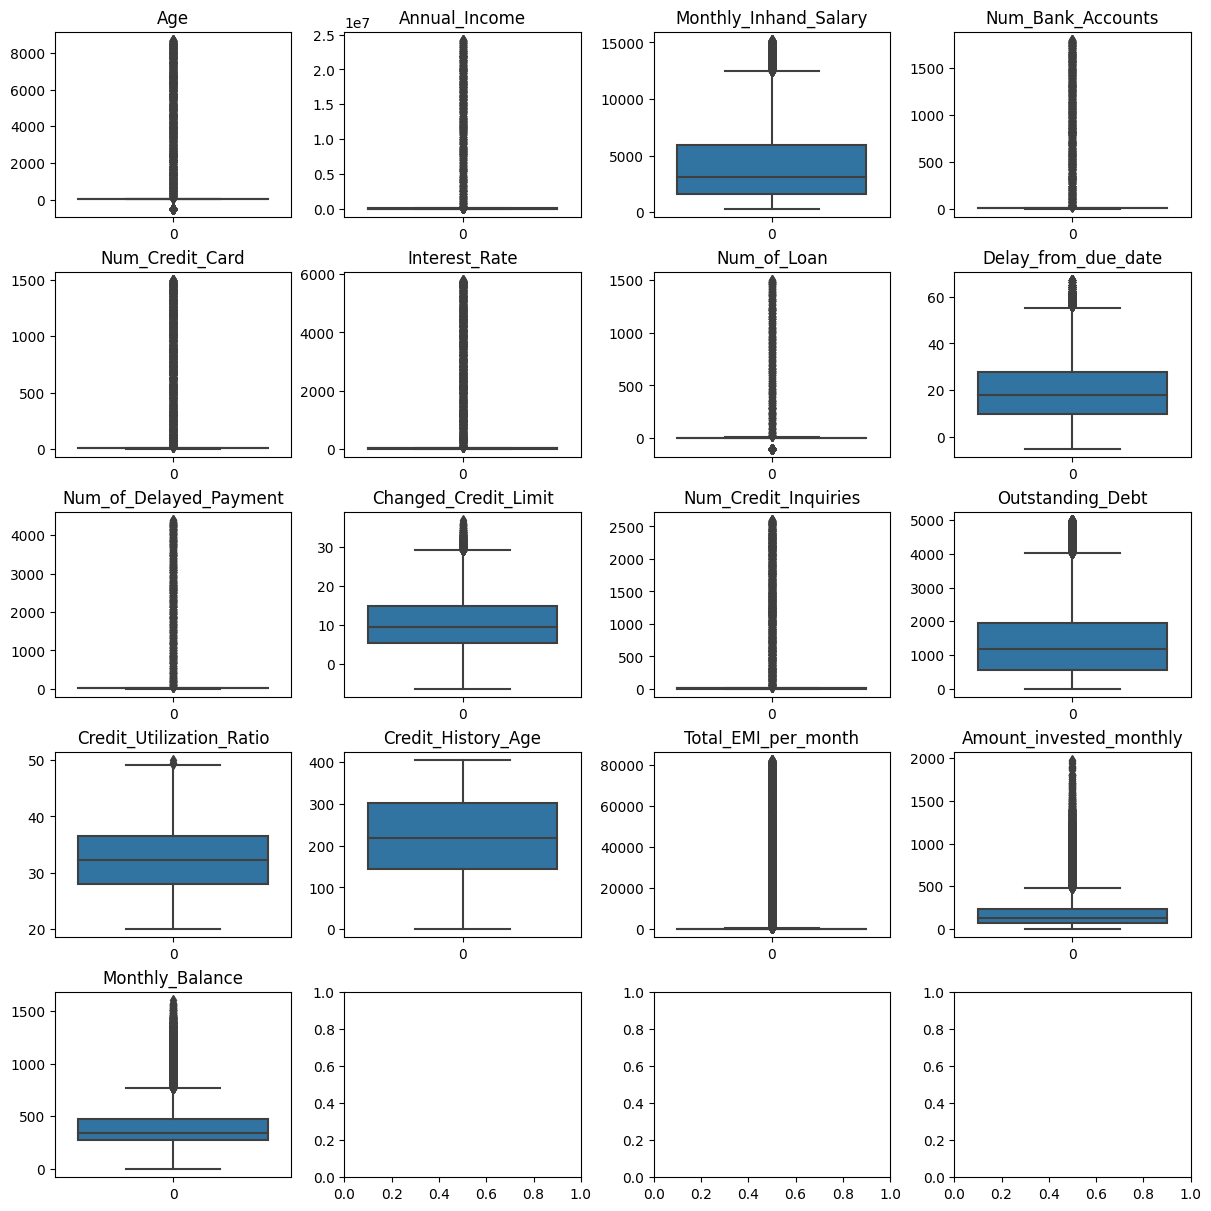

In [37]:
%matplotlib inline
fig, axs = plt.subplots(5, 4, figsize=(12,12), constrained_layout=True)

for col, ax in zip(num, axs.flatten()):
    sns.boxplot(data=df[col], ax=ax)
    ax.set_title(col)

## Analyze all the features ##

### Month ###

In [38]:
df.Month.value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

### Age ###

In [40]:
df.Age.value_counts()

38.0      2994
28.0      2968
31.0      2955
26.0      2945
32.0      2884
          ... 
1908.0       1
4583.0       1
7549.0       1
3119.0       1
1342.0       1
Name: Age, Length: 1728, dtype: int64

### Occupation ###

In [41]:
df.Occupation.value_counts()

                7062
Lawyer          6575
Architect       6355
Engineer        6350
Scientist       6299
Mechanic        6291
Accountant      6271
Developer       6235
MediaManager    6232
Teacher         6215
Entrepreneur    6174
Doctor          6087
Journalist      6085
Manager         5973
Musician        5911
Writer          5885
Name: Occupation, dtype: int64

### Annual Income ### 

In [42]:
df.Annual_Income.value_counts()

17816.75       16
22434.16       16
40341.16       16
17273.83       16
109945.32      16
               ..
17079092.00     1
1910572.00      1
20179076.00     1
7980216.00      1
8299495.00      1
Name: Annual_Income, Length: 13487, dtype: int64

### Amount_invested_monthly ###

In [13]:
initializer = initializers.HeNormal()

def build_model(hp):
    tf.random.set_seed(1234) # applied to achieve consistent results
    model = Sequential(name='Credit_Score_classification')
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(
            Dense(
                units=512, 
                activation='relu', 
                kernel_regularizer=L2(
                    hp.Float(f'reg_{i}', 5e-5, 5e-4, step=5e-5, default=5e-4)),
                name=f'L{i}')
            )
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f'dropout_{i}',
            0.10,
            0.50,
            step=0.05,
            default=0.50), seed=123))
        
    model.add(
        Dense(3, kernel_initializer=initializer, activation='linear'),
        name=f'L{i+1}'
        )
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('lrate', values=[1e-2, 1e-3])),
        loss=SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
        )
    
    return model

In [ ]:
import keras_tuner as kt

# RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=30,
    #exectutions_per_trial=1,
    directory='keras_tuner',
    project_name="3class_classification",
    overwrite=True
)

tuner.search(
    x=X_train,
    y=y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.25)